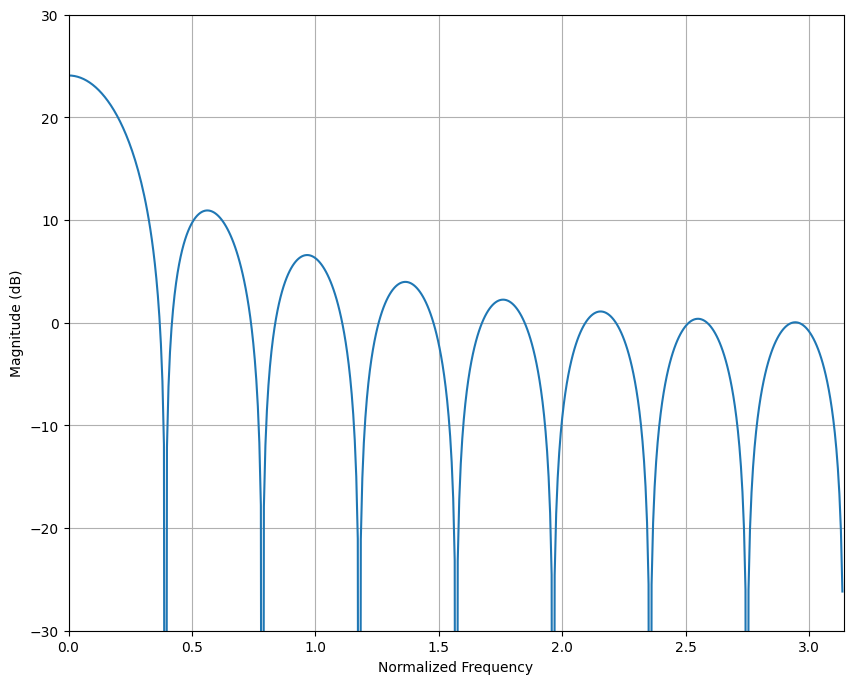

In [20]:
import numpy as np  # Modul untuk operasi matematika
import matplotlib.pyplot as plt  # Modul untuk plotting
import scipy.signal as signal  # Modul untuk sinyal

# Membuat respons impuls sederhana dengan panjang 16
h = np.ones(16)

# Menghitung respons frekuensi menggunakan freqz
omega, H = signal.freqz(h)

# Plot respons magnitudo frekuensi
plt.figure(figsize=(10, 8))  # Ukuran gambar
plt.plot(omega, 20 * np.log10(abs(H) + 1e-6))  # Plot magnitudo dalam dB
plt.axis([0, 3.14, -30, 30])  # Batas sumbu x dan y
plt.xlabel('Normalized Frequency')  # Label sumbu x
plt.ylabel('Magnitude (dB)')  # Label sumbu y
plt.grid()  # Menampilkan grid


In [21]:
import numpy as np  # Modul untuk operasi matematika
import scipy.signal as signal  # Modul untuk sinyal

def errfunc(h):
    numfreqsamples = 512

    # Panjang pasband yang diinginkan:
    pb = int(numfreqsamples / 4.0)
    # Panjang daerah transisi yang diinginkan:
    tb = int(numfreqsamples / 8.0)

    # Menghitung respons frekuensi dari filter FIR dengan h sebagai respons impuls
    w, H = signal.freqz(h, 1, numfreqsamples)

    # Respons magnitudo yang diinginkan (1 di dalam pasband, 0 di luar)
    H_desired = np.concatenate((np.ones(pb), np.zeros(numfreqsamples - pb)))

    # Memberikan bobot lebih besar pada daerah transisi untuk mengurangi error di sana
    weights = np.concatenate((np.ones(pb), np.zeros(tb), 1000 * np.ones(numfreqsamples - pb - tb)))

    # Menghitung nilai error sebagai selisih antara respons aktual dan yang diinginkan
    err = np.sum(np.abs(H - H_desired) * weights)
    return err


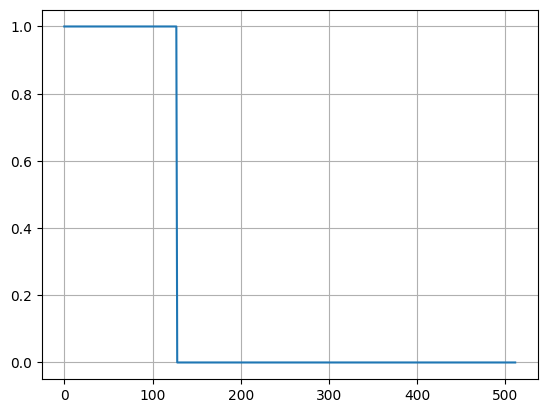

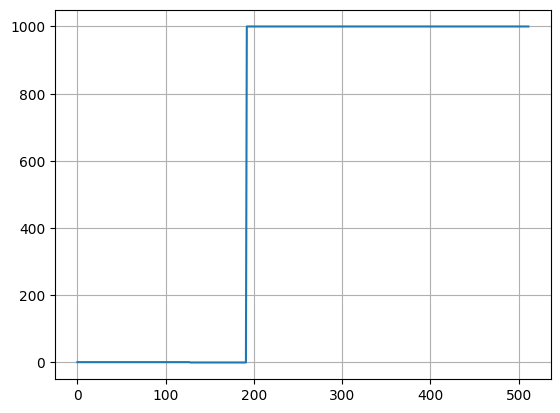

In [22]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#passband yang diinginkan:
pb=int(numfreqsamples/4.0)  # Panjang passband yang diinginkan
#transition band yang diinginkan:
tb=int(numfreqsamples/8.0)   # Panjang transition band yang diinginkan

# Lihat H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()


In [28]:
import scipy.optimize as opt

# Minimalkan fungsi kesalahan menggunakan fungsi errfunc dengan inisialisasi acak
minout = opt.minimize(errfunc, np.random.rand(16))

# Ambil hasil optimal dari minimum
h = minout.x

# Cetak hasil
print(h)


[-0.0004908  -0.00237828 -0.0070249  -0.0153962  -0.02729687 -0.04064261
 -0.0520582  -0.05797903 -0.05645129 -0.04796668 -0.03534177 -0.02221448
 -0.01159395 -0.00477023 -0.00138194 -0.00018727]


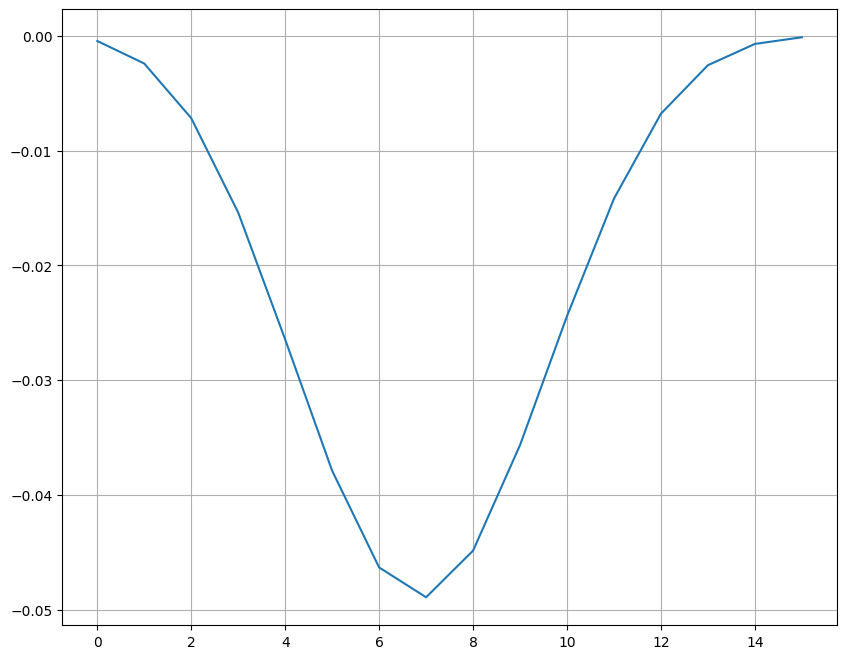

In [5]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

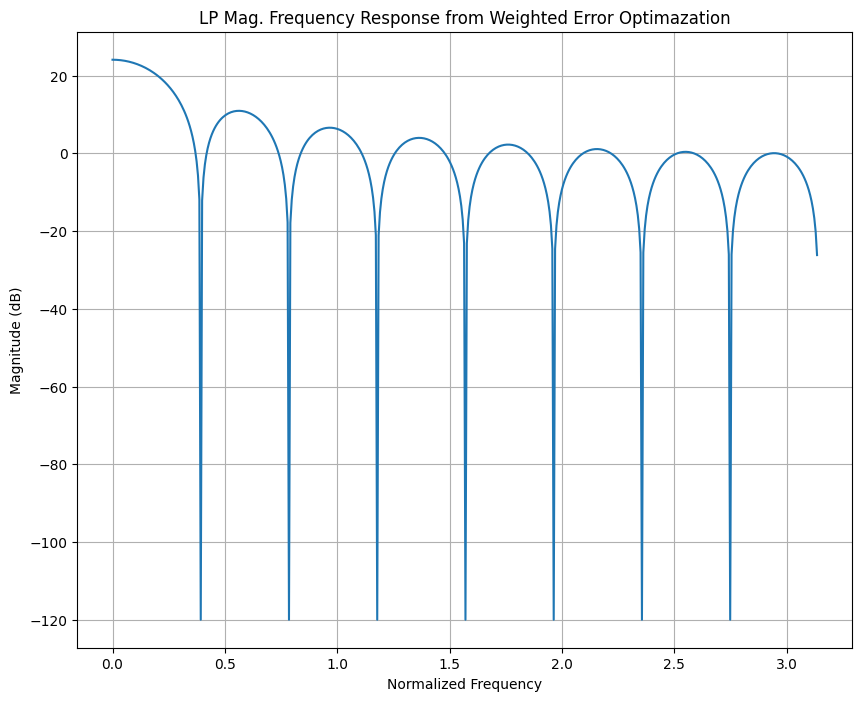

In [23]:
omega, H =signal.freqz(h)  # Membuat plot respons frekuensi untuk sinyal filter h
plt.figure(figsize=(10,8)) # Mengatur ukuran gambar
plt.plot(omega, 20*np.log10(abs(H)+1e-6))  # Membuat plot magnitude respons frekuensi dalam dB
plt.xlabel('Normalized Frequency')  # Memberi label sumbu x
plt.ylabel('Magnitude (dB)') # Memberi label sumbu y
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation') # Menambahkan judul plot
plt.grid() # Menampilkan grid pada plot

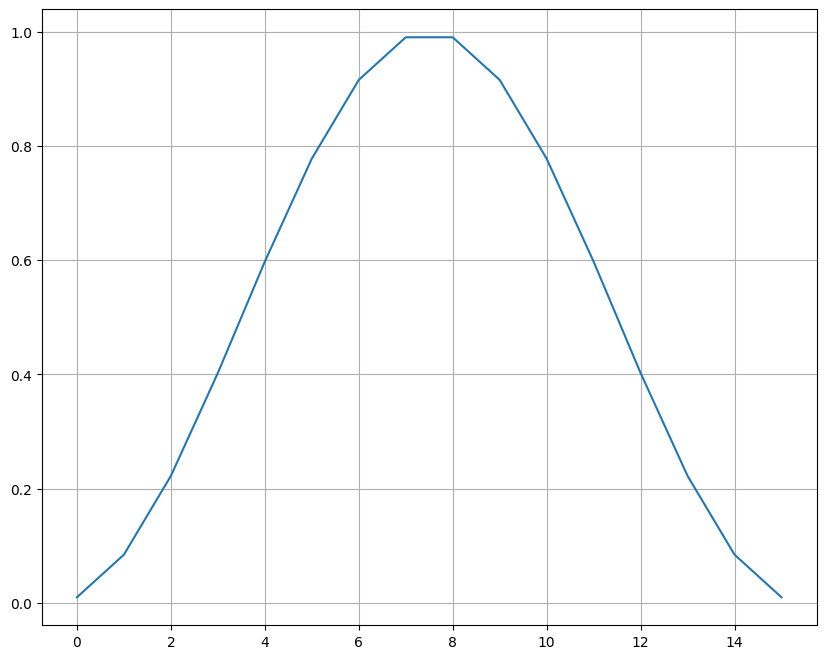

In [8]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

In [26]:
def freqz(x):
    # Dapatkan nilai frekuensi dan magnitudo sesuai
    f, H = signal.freqz(x)

    # Frekuensi dinormalisasi
    fNorm = f/np.pi

    # Magnitudo dalam dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" untuk menghindari log10(0)!

    # Buka gambar
    plt.figure(figsize=(10,8))

    # Plot magnitudo
    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Frekuensi Terormalisasi (rad/sample)')
    plt.ylabel('Magnitudo (dB)')

    # Plot fase
    plt.subplot(212)
    plt.title('Fase')
    sudut = np.unwrap(np.angle(H))
    sudutDerajat = (360 * sudut)/(2*np.pi)
    plt.plot(f, sudutDerajat, 'b')
    plt.axis([0,3.14,np.min(sudutDerajat),np.max(sudutDerajat)])
    plt.grid(True)
    plt.xlabel('Frekuensi Terormalisasi (rad/sample)')
    plt.ylabel('Fase (derajat)')
    plt.tight_layout()

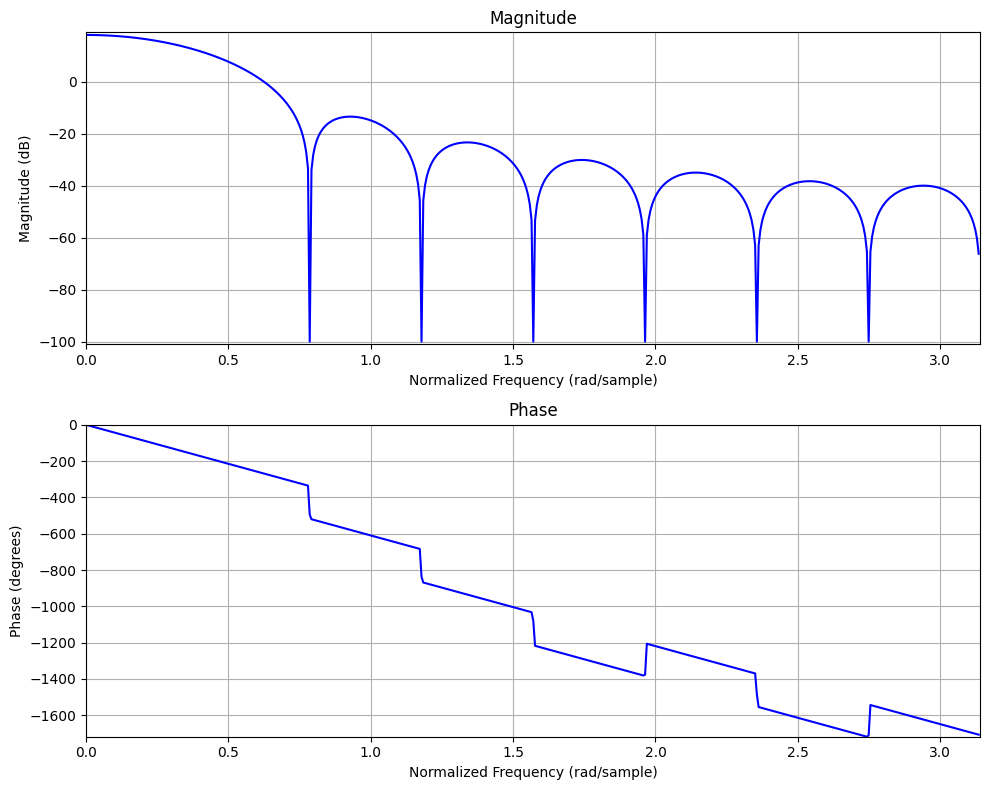

In [14]:
freqz(h)

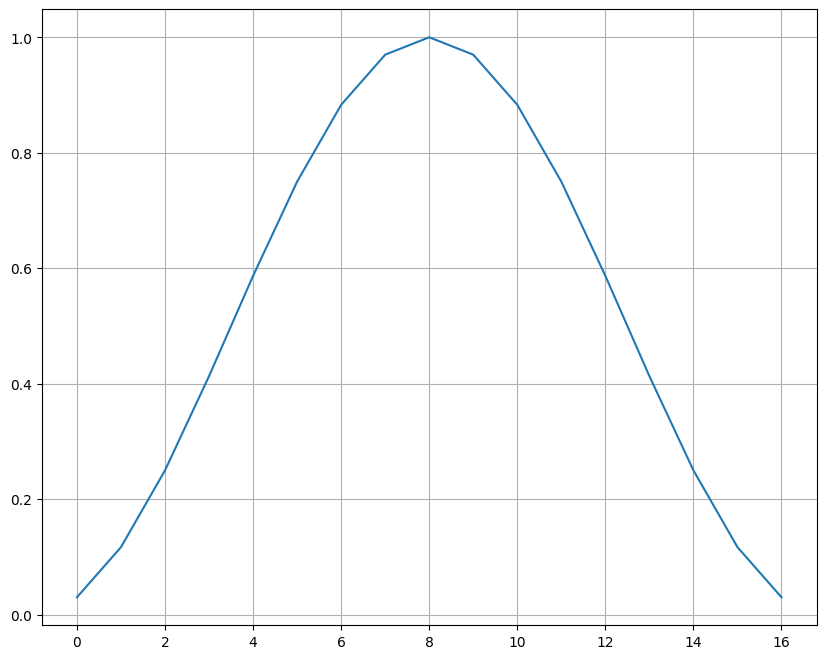

In [27]:
h = 0.5 - 0.5 * np.cos(2 * np.pi / 18 * (np.arange(17) + 1))

# Buat plot respons impuls dari filter h
plt.figure(figsize=(10,8))

# Plot respons impuls
plt.plot(h)

# Menampilkan grid
plt.grid()


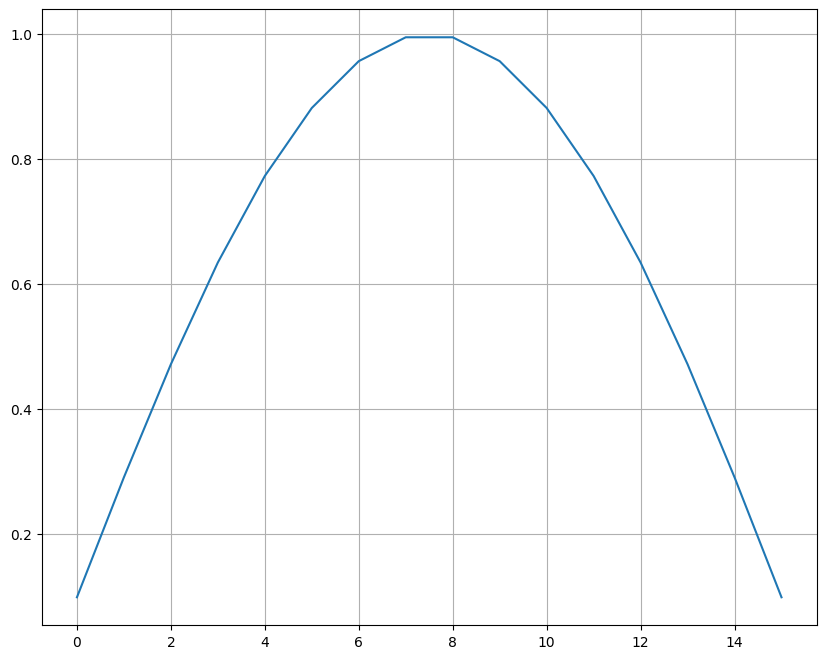

In [19]:
s = np.sin(np.pi / 16 * (np.arange(16) + 0.5))

# Buat plot dari sinyal s
plt.figure(figsize=(10,8))

# Plot sinyal s
plt.plot(s)

# Menampilkan grid pada plot
plt.grid()


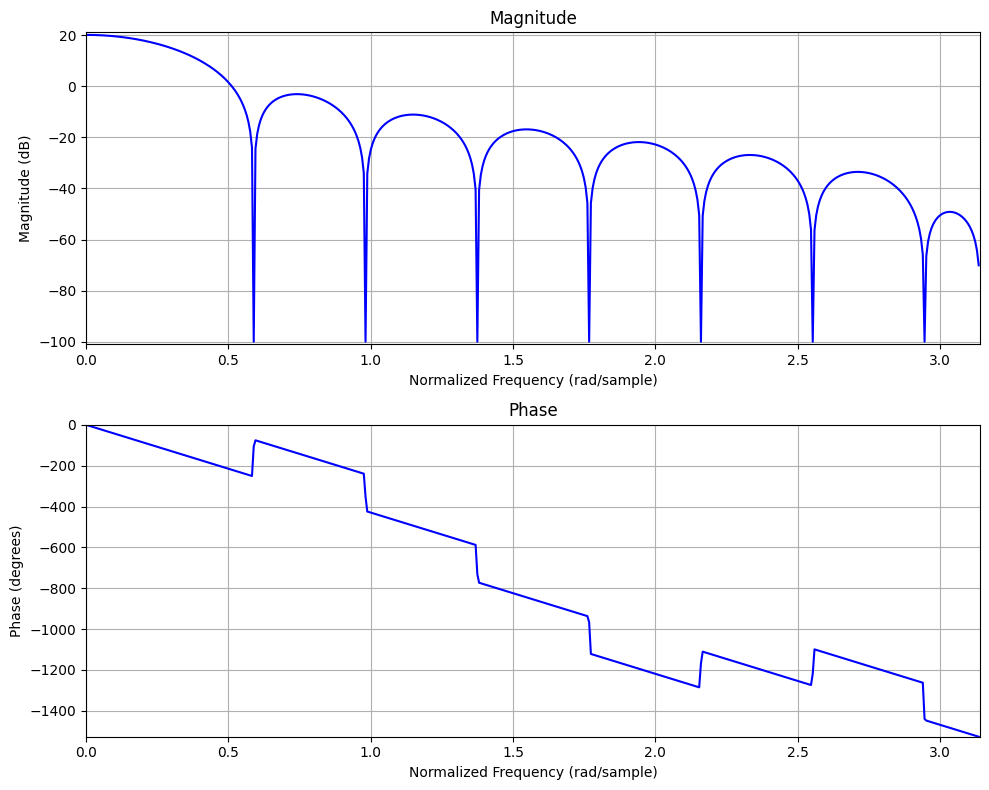

In [17]:
freqz(s)